Iteration 0: {'P1': (None, 0), 'P2': ('P1', 5), 'P3': ('P1', 1), 'P4': ('P1', 3), 'P5': ('P3', 3)}


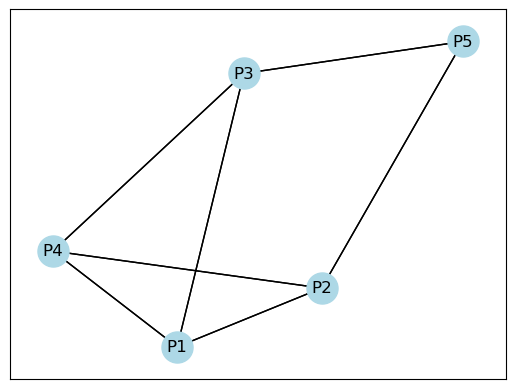

Iteration 1: {'P1': (None, 0), 'P2': ('P5', 4), 'P3': ('P1', 1), 'P4': ('P3', 2), 'P5': ('P3', 4)}


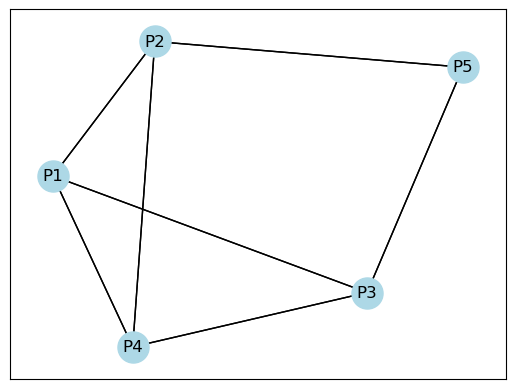

Iteration 2: {'P1': (None, 0), 'P2': ('P4', 4), 'P3': ('P1', 1), 'P4': ('P3', 2), 'P5': ('P3', 4)}


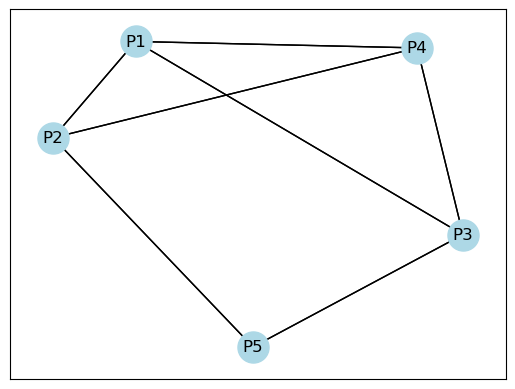

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random
# Graph represented as a dictionary
#graph = {
#    'A': [('B', 1), ('C', 3), ('D', 7)],
#    'B': [('A', 1), ('D', 5)],
#    'C': [('A', 3), ('D', 2)],
#    'D': [('A', 7), ('B', 5), ('C', 2)]
#}
graph = {
    'P1': [('P2', 5), ('P3', 1), ('P4', 3)],
    'P2': [('P1', 5), ('P4', 2), ('P5', 1)],
    'P3': [('P1', 1), ('P4', 1), ('P5', 3)],
    'P4': [('P1', 3), ('P2', 2), ('P3', 1)],
    'P5': [('P2', 1), ('P3', 3)]
}



# Function to draw the graph
def draw_graph(G, random_edges):
    pos = nx.spring_layout(G)
    labels = {node: node for node in G.nodes}
    edge_colors = ['red' if (src, dest) in random_edges.items() else 'black' for src, dest in G.edges()]
    nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, labels=labels)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
    plt.show()

# Function to find the random edges
def find_random_edges(graph, root):
    random_edges = {root: (None, 0)}
    for node in graph:
        if node != root:
            random_edges[node] = random.choice(graph[node])
    return random_edges

# Self-Stabilizing Shortest Path Tree Algorithm
def self_stabilizing_spt(graph, root):
    G = nx.Graph()
    G.add_nodes_from(graph.keys())
    for node, edges in graph.items():
        for edge in edges:
            G.add_edge(node, edge[0], weight=edge[1])

    random_edges = find_random_edges(graph, root)
    
    iteration = 0
    while True:
        print(f"Iteration {iteration}: {random_edges}")

        draw_graph(G, random_edges)

        new_random_edges = random_edges.copy()
        for node in graph:
            if node != root:
                candidate_edges = [(neighbor, weight + random_edges[neighbor][1]) for neighbor, weight in graph[node]]
                new_random_edges[node] = min(candidate_edges, key=lambda x: x[1])
                
        if new_random_edges == random_edges:
            break
            
        random_edges = new_random_edges
        iteration += 1
        
    return random_edges

# Running the algorithm
shortest_path_tree = self_stabilizing_spt(graph, 'P1')



Iteration 0: {'P1': (None, 0), 'P2': ('P1', 6), 'P3': ('P1', 1), 'P4': ('P1', 3), 'P5': ('P3', 3)}


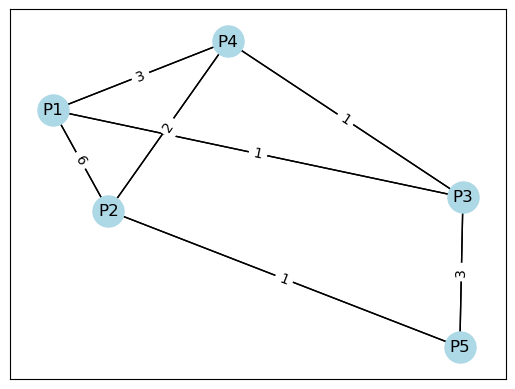

Iteration 1: {'P1': (None, 0), 'P2': ('P5', 4), 'P3': ('P1', 1), 'P4': ('P3', 2), 'P5': ('P3', 4)}


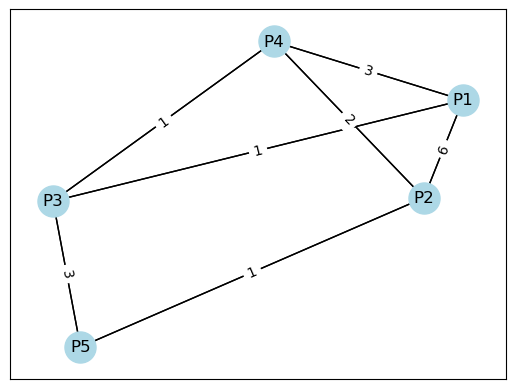

Iteration 2: {'P1': (None, 0), 'P2': ('P4', 4), 'P3': ('P1', 1), 'P4': ('P3', 2), 'P5': ('P3', 4)}


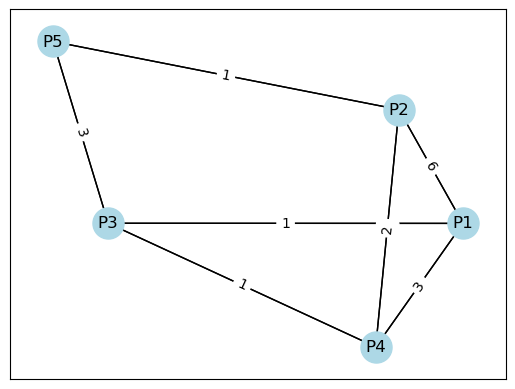

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import random

graph = {
    'P1': [('P2', 6), ('P3', 1), ('P4', 3)],
    'P2': [('P1', 6), ('P4', 2), ('P5', 1)],
    'P3': [('P1', 1), ('P4', 1), ('P5', 3)],
    'P4': [('P1', 3), ('P2', 2), ('P3', 1)],
    'P5': [('P2', 1), ('P3', 3)]
}

def draw_graph(G, random_edges):
    pos = nx.spring_layout(G)
    labels = {node: node for node in G.nodes}
    edge_colors = ['red' if (src, dest) in random_edges.items() else 'black' for src, dest in G.edges()]
    edge_labels = nx.get_edge_attributes(G, 'weight')  # エッジのコストを取得
    nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, labels=labels)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # エッジのコストを描画
    plt.show()

def find_random_edges(graph, root):
    random_edges = {root: (None, 0)}
    for node in graph:
        if node != root:
            random_edges[node] = random.choice(graph[node])
    return random_edges

def self_stabilizing_spt(graph, root, initial_spt=None):
    G = nx.Graph()
    G.add_nodes_from(graph.keys())
    for node, edges in graph.items():
        for edge in edges:
            G.add_edge(node, edge[0], weight=edge[1])

    random_edges = find_random_edges(graph, root)
    
    if initial_spt is not None:
        random_edges.update(initial_spt)
    
    iteration = 0
    while True:
        print(f"Iteration {iteration}: {random_edges}")

        draw_graph(G, random_edges)

        new_random_edges = random_edges.copy()
        for node in graph:
            if node != root:
                candidate_edges = [(neighbor, weight + random_edges[neighbor][1]) for neighbor, weight in graph[node]]
                new_random_edges[node] = min(candidate_edges, key=lambda x: x[1])
                
        if new_random_edges == random_edges:
            break
            
        random_edges = new_random_edges
        iteration += 1
        
    return random_edges

# 初期の最短経路木（SPT）を指定
initial_spt = {
    'P1': (None, 0),  # ルートノード
    'P2': ('P1', 6),  # P1へのエッジ
    'P3': ('P1', 1),  # P1へのエッジ
    'P4': ('P1', 3),  # P1へのエッジ
    'P5': ('P3', 3)   # P2へのエッジ
}

shortest_path_tree = self_stabilizing_spt(graph, 'P1', initial_spt)


Iteration 0: {'P1': (None, 0), 'P2': ('P1', 6), 'P3': ('P1', 4), 'P4': ('P1', 3), 'P5': ('P2', 7)}


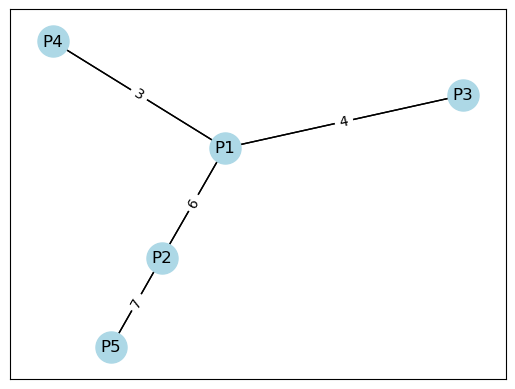

Iteration 1: {'P1': (None, 0), 'P2': ('P4', 5), 'P3': ('P1', 1), 'P4': ('P1', 3), 'P5': ('P2', 7)}


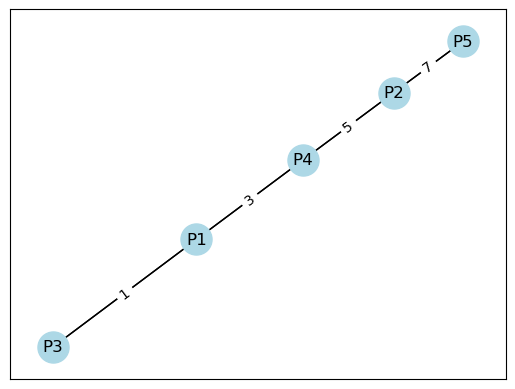

Iteration 2: {'P1': (None, 0), 'P2': ('P4', 5), 'P3': ('P1', 1), 'P4': ('P3', 2), 'P5': ('P3', 4)}


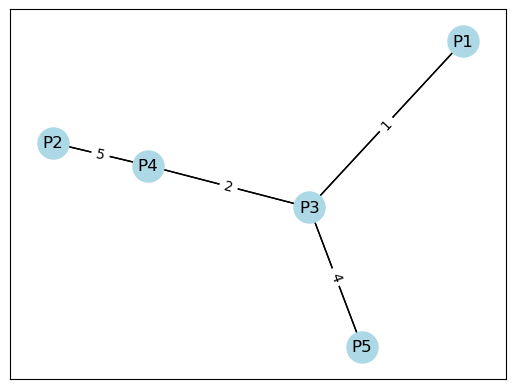

Iteration 3: {'P1': (None, 0), 'P2': ('P4', 4), 'P3': ('P1', 1), 'P4': ('P3', 2), 'P5': ('P3', 4)}


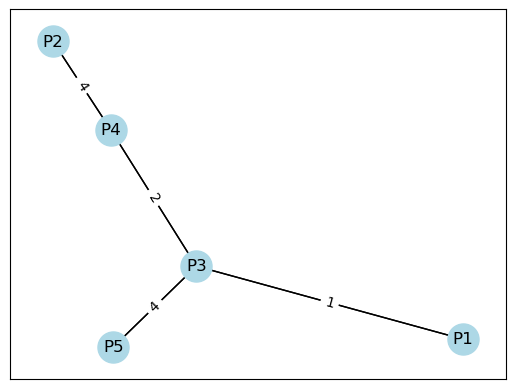

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import random

graph = {
    'P1': [('P2', 6), ('P3', 1), ('P4', 3)],
    'P2': [('P1', 6), ('P4', 2), ('P5', 1)],
    'P3': [('P1', 1), ('P4', 1), ('P5', 3)],
    'P4': [('P1', 3), ('P2', 2), ('P3', 1)],
    'P5': [('P2', 1), ('P3', 3)]
}

def draw_graph(G, random_edges):
    pos = nx.spring_layout(G)
    labels = {node: node for node in G.nodes}
    edge_colors = ['red' if (src, dest) in random_edges.items() else 'black' for src, dest in G.edges()]
    edge_labels = nx.get_edge_attributes(G, 'weight')  # エッジのコストを取得
    nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, labels=labels)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # エッジのコストを描画
    plt.show()

def find_random_edges(graph, root):
    random_edges = {root: (None, 0)}
    for node in graph:
        if node != root:
            random_edges[node] = random.choice(graph[node])
    return random_edges

def self_stabilizing_spt(graph, root, initial_spt=None):
    G = nx.Graph()
    G.add_nodes_from(graph.keys())

    random_edges = find_random_edges(graph, root)
    if initial_spt is not None:
        random_edges.update(initial_spt)
    
    iteration = 0
    while True:
        print(f"Iteration {iteration}: {random_edges}")

        G.clear()
        G.add_nodes_from(graph.keys())
        for node, edges in random_edges.items():
            if edges[0] is not None:
                G.add_edge(node, edges[0], weight=edges[1])
        
        draw_graph(G, random_edges)

        new_random_edges = random_edges.copy()
        for node in graph:
            if node != root:
                candidate_edges = [(neighbor, weight + random_edges[neighbor][1]) for neighbor, weight in graph[node]]
                new_random_edges[node] = min(candidate_edges, key=lambda x: x[1])
                
        if new_random_edges == random_edges:
            break
            
        random_edges = new_random_edges
        iteration += 1
        
    return random_edges

# 初期の最短経路木（SPT）を指定
initial_spt = {
    'P1': (None, 0),  # ルートノード
    'P2': ('P1', 6),  # P1へのエッジ
    'P3': ('P1', 4),  # P1へのエッジ
    'P4': ('P1', 3),  # P1へのエッジ
    'P5': ('P2', 7)   # P2へのエッジ
}

shortest_path_tree = self_stabilizing_spt(graph, 'P1', initial_spt)
